In [152]:
#Combined cycle power plant model implementation
#Reference: https://www.mdpi.com/2079-9292/12/11/2431
#Reference: House Price Prediction using Random Forest Machine Learning Technique
#Author:Kritika p and Pravalika P
#Revision:R 0.1 May 14, 2025

In [153]:
#SEMMA approach
#Import required libraries
#Data management libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

#Exploration
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

#Validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error



In [154]:
#Read the data
df = pd.read_csv("C:\\Users\\kritika\\Downloads\\HousingData.csv")

In [155]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [156]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [157]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
239,0.09252,30.0,4.93,0.0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,23.3
304,0.05515,33.0,2.18,0.0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.93,36.1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: ylabel='Frequency'>

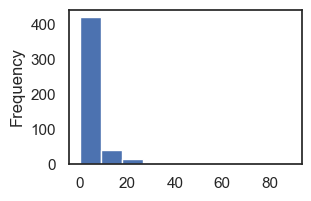

In [158]:
#Explore - distributions
df.CRIM.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

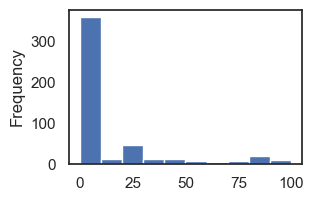

In [159]:
#Explore - distributions
df.ZN.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

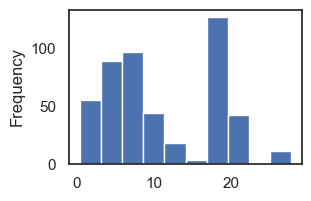

In [160]:
#Explore - distributions
df.INDUS.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

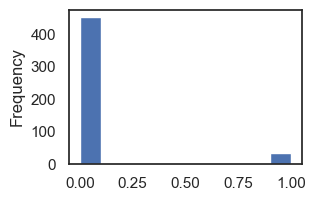

In [161]:
#Explore - distributions
df.CHAS.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

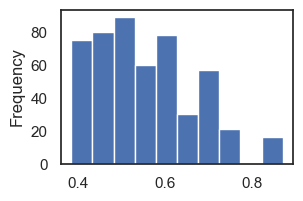

In [162]:
#Explore - distributions
df.NOX.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

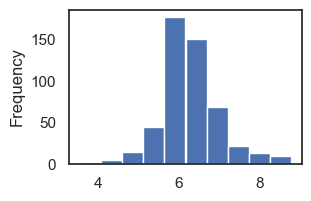

In [163]:
#Explore - distributions
df.RM.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

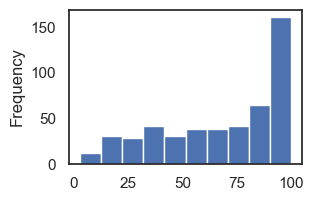

In [164]:
#Explore - distributions
df.AGE.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

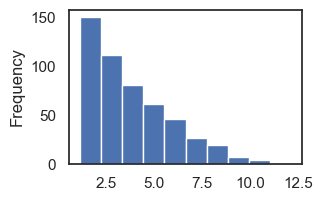

In [165]:
#Explore - distributions
df.DIS.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

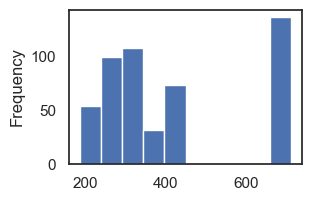

In [166]:
#Explore - distributions
df.TAX.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

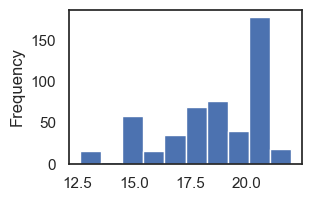

In [167]:
#Explore - distributions
df.PTRATIO.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

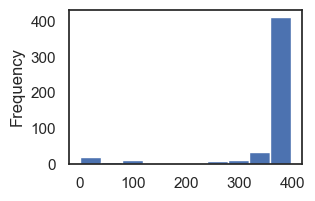

In [168]:
#Explore - distributions
df.B.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

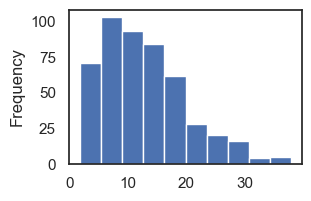

In [169]:
#Explore - distributions
df.LSTAT.plot.hist(figsize = (3,2))

<Axes: ylabel='Frequency'>

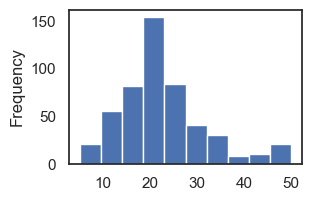

In [170]:
#Explore - distributions
df.MEDV.plot.hist(figsize = (3,2))

In [171]:
#WHat columns are there
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [172]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [173]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [174]:
# DATA PREPROCESSING
# Handing the missing values 
# Mean

df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].median(), inplace=True)
df['INDUS'].fillna(df['INDUS'].median(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)



In [175]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [196]:
# Checking the outliers for only numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


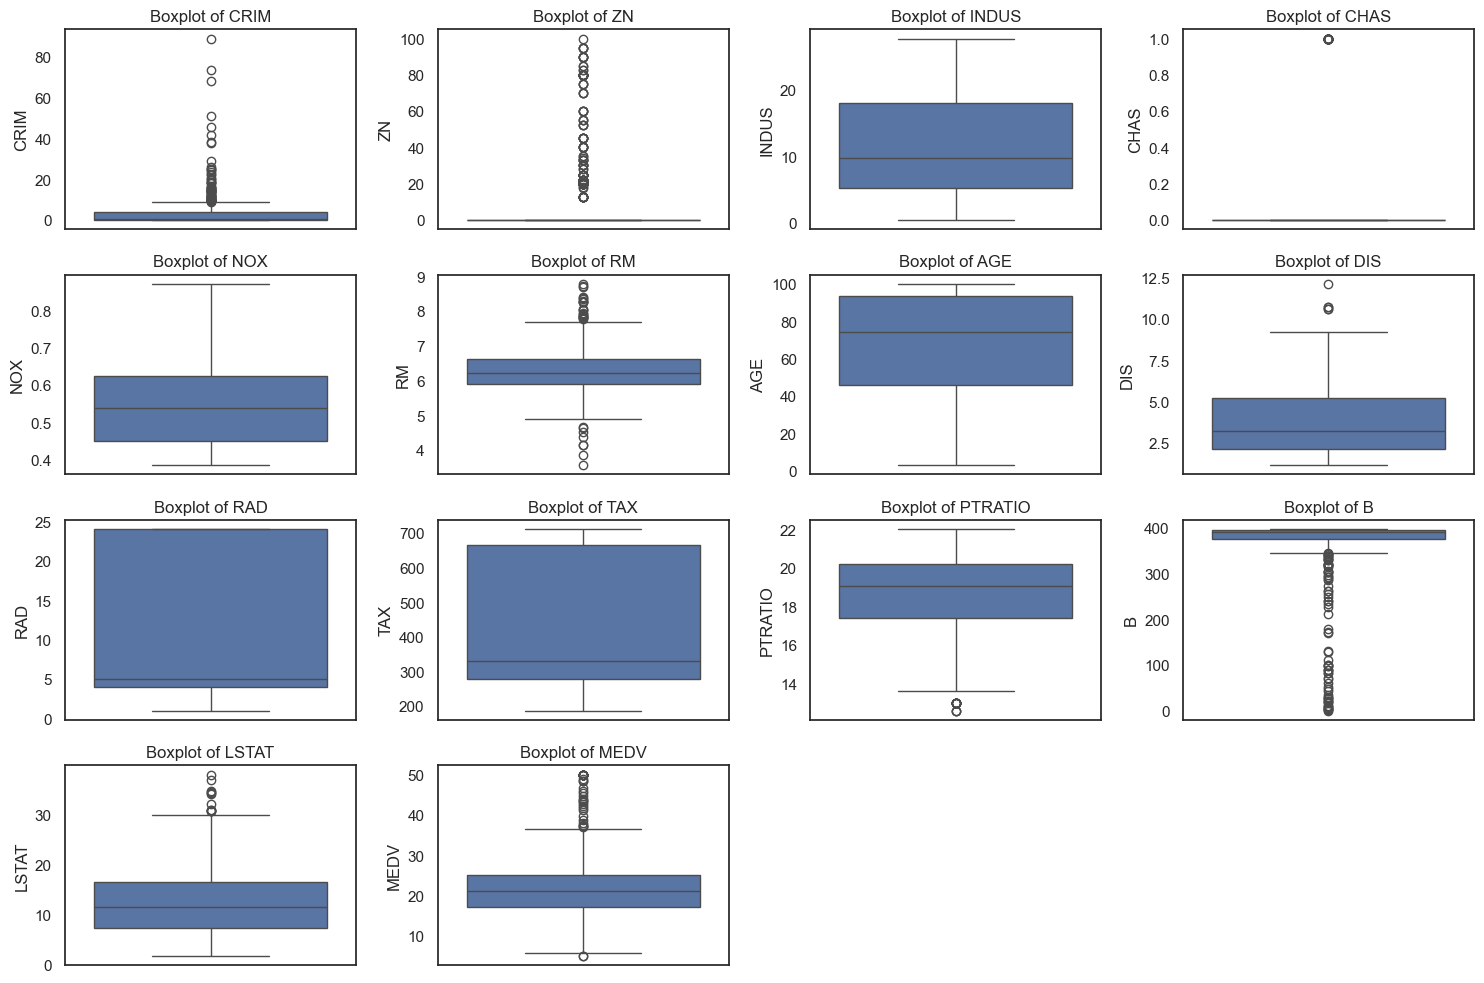

In [197]:
# checking for Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [198]:
# another method to chech for outliers

Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound)]
print(f'Number of outliers in MEDV: {len(outliers)}')


Number of outliers in MEDV: 40


In [199]:
# Outliers in every columns representing in numerical form

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


CRIM: 64 outliers
ZN: 126 outliers
INDUS: 0 outliers
CHAS: 34 outliers
NOX: 0 outliers
RM: 30 outliers
AGE: 0 outliers
DIS: 5 outliers
RAD: 0 outliers
TAX: 0 outliers
PTRATIO: 15 outliers
B: 77 outliers
LSTAT: 12 outliers
MEDV: 40 outliers


In [200]:
# detecting the outliers
# removing the column chas because its a categorical data

# Make a copy of the dataset
df_no_outliers = df.copy()

# List of numerical columns (excluding categorical ones like 'CHAS' if needed)
numerical_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('CHAS')  # optional if CHAS is categorical (0/1)

# Remove outliers column by column
for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]


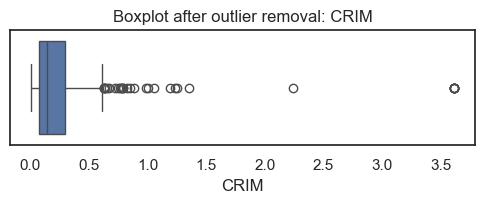

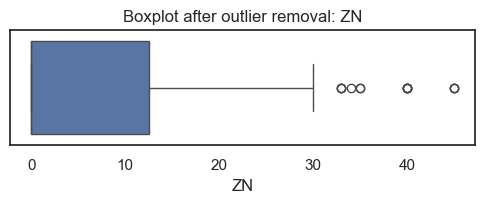

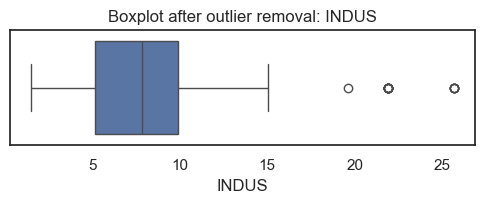

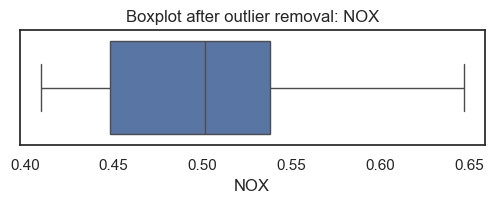

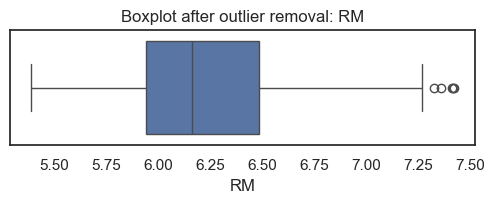

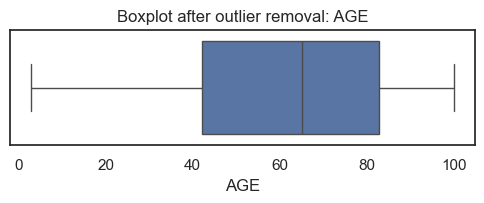

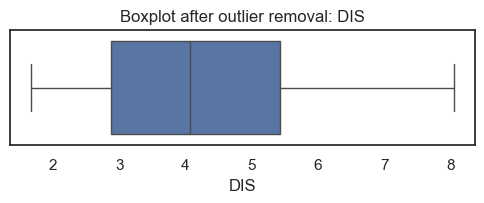

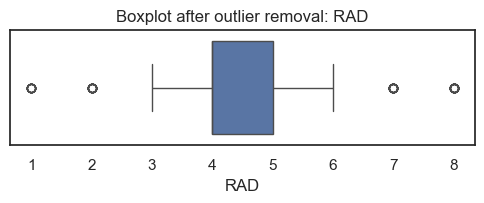

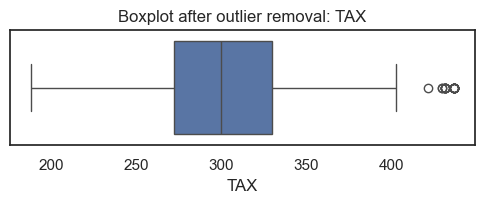

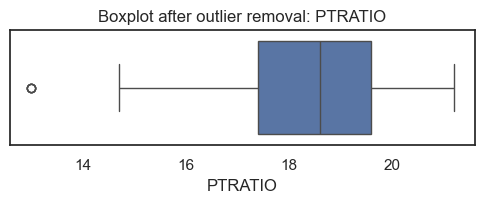

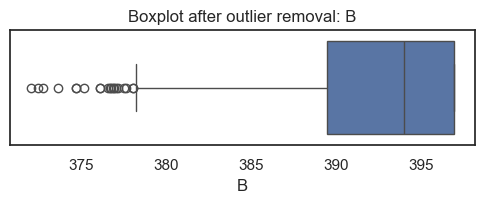

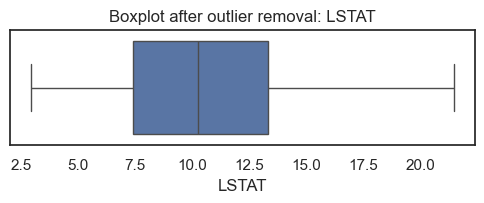

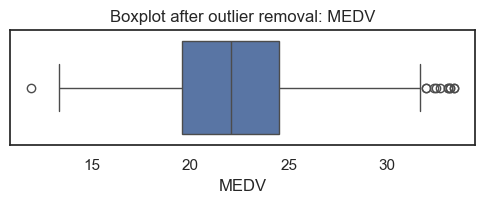

In [201]:
# before removing outliers
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df_no_outliers, x=col)
    plt.title(f'Boxplot after outlier removal: {col}')
    plt.show()


In [206]:
# removing the outliers
# method 1 IQR 
df_capped = df.copy()

numerical_cols = df_capped.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'CHAS' in numerical_cols:  # If CHAS is categorical, remove it
    numerical_cols.remove('CHAS')

for col in numerical_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values outside lower and upper bounds
    df_capped[col] = df_capped[col].clip(lower, upper)


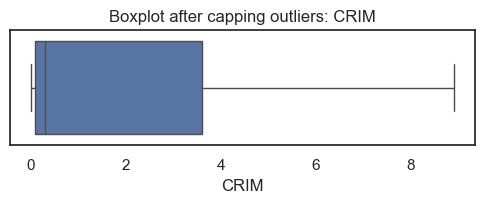

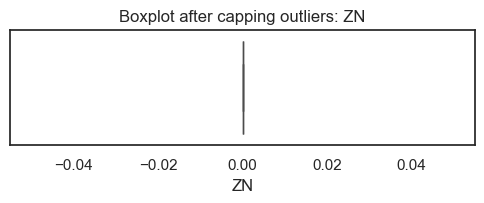

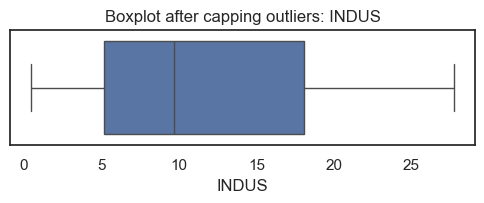

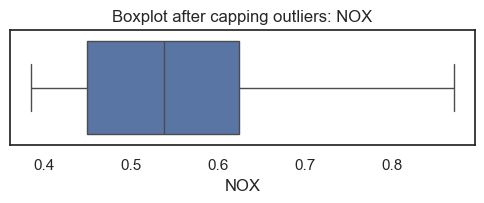

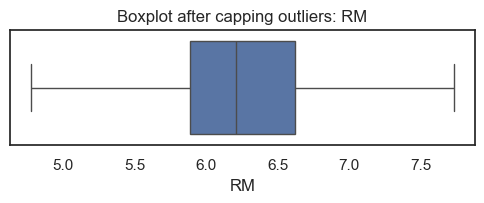

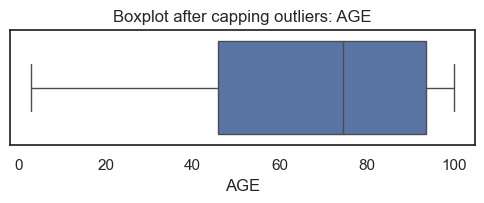

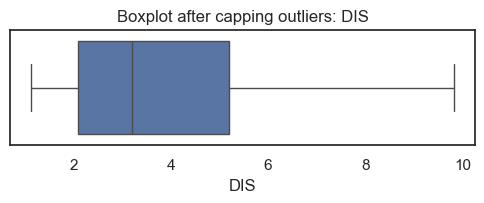

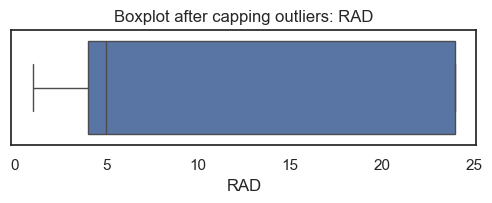

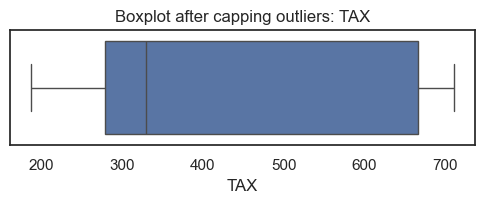

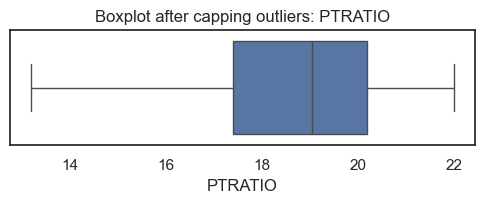

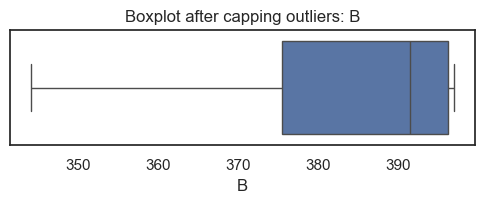

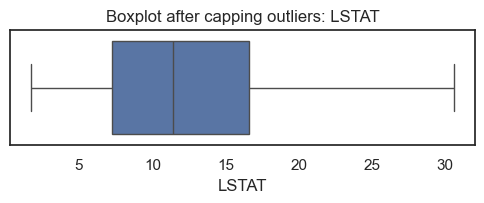

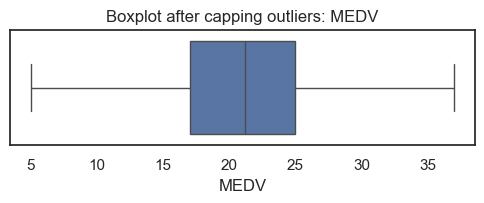

In [203]:
# After removing the outliers by CAPPING METHOD
# Method 2
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_capped[col])
    plt.title(f'Boxplot after capping outliers: {col}')
    plt.show()


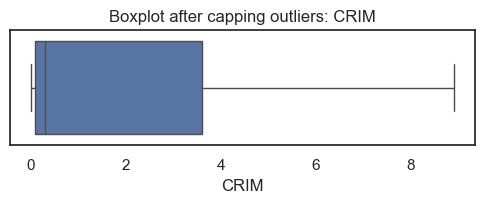

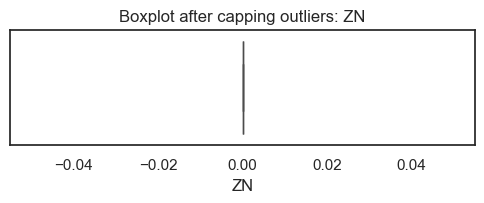

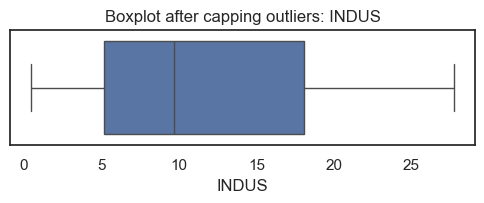

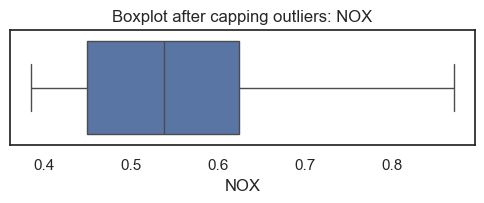

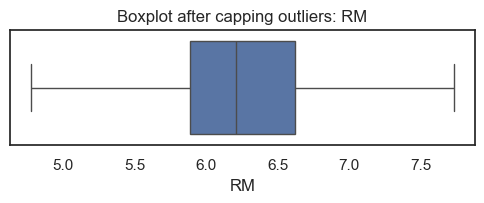

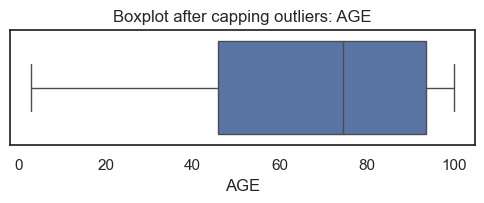

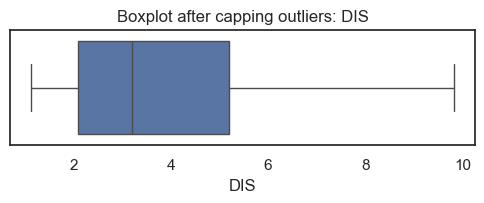

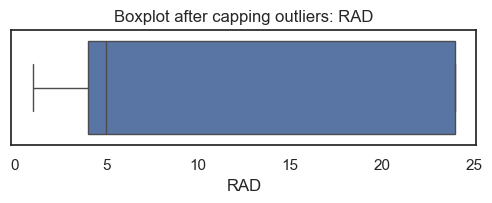

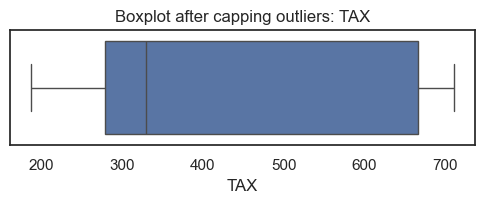

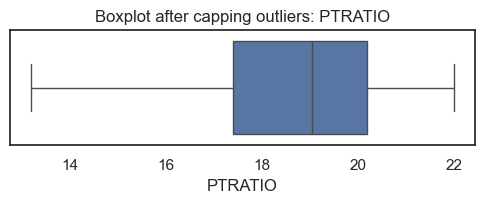

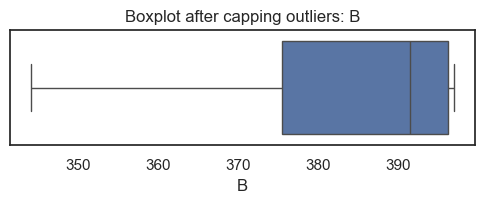

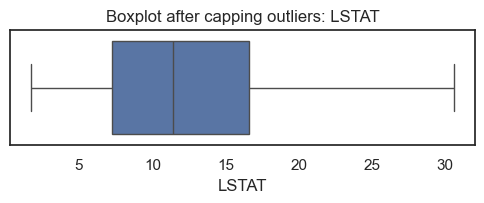

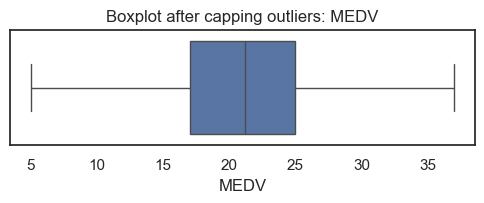

In [207]:
# After removing the outliers by CAPPING METHOD
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_capped[col])
    plt.title(f'Boxplot after capping outliers: {col}')
    plt.show()


In [204]:
# Feature scaling by Min-Max Method
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [205]:
print(df_scaled.head())


       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.267660  0.693333  


In [184]:
print(df_scaled['RM'].min(), df_scaled['RM'].max())


0.0 0.9999999999999999


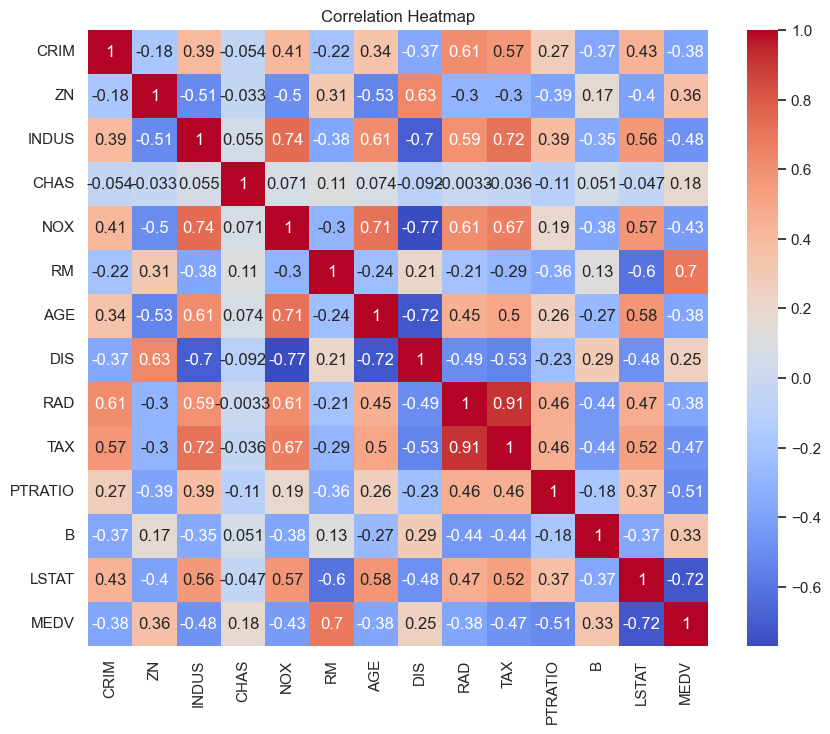

In [185]:
# correlation 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [186]:
correlation_with_target = df_scaled.corr()['MEDV'].sort_values(ascending=False)
print(correlation_with_target)


MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64


In [187]:
#  DELETING RAD BECAUSE IT HAS LOWER CORRELATION WITH MEDV AND DO NOT AFFECT THE MEDV
df_scaled.drop(columns=['RAD'], inplace=True)


In [188]:
print(df_scaled.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [189]:
# FEATURE SCALING

# TRAINING AND TESTING 70:30

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['MEDV'])  # All columns except target
y = df['MEDV']                 # Target column

# Split the data: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (354, 13)
Testing set size: (152, 13)


In [190]:
# RANDOM FOREST 1. SPLITING THE DATA

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame and 'MEDV' is the target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Regressor Evaluation:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Random Forest Regressor Evaluation:
MAE: 2.0984881578947387
MSE: 9.317838119210522
RMSE: 3.0525134101606373
R² Score: 0.8749503285536732


In [191]:
# CROSS VALIDATION FOR RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Initialize the model
rf_cv_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Cross-validation predictions (5-fold)
y_pred_cv = cross_val_predict(rf_cv_model, X, y, cv=5)

# Evaluation metrics
mae_cv = mean_absolute_error(y, y_pred_cv)
mse_cv = mean_squared_error(y, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)
r2_cv = r2_score(y, y_pred_cv)

# Output results
print("Random Forest with Cross-Validation (5-fold):")
print(f"MAE: {mae_cv}")
print(f"MSE: {mse_cv}")
print(f"RMSE: {rmse_cv}")
print(f"R² Score: {r2_cv}")


Random Forest with Cross-Validation (5-fold):
MAE: 3.0867114624505927
MSE: 21.888164814545473
RMSE: 4.678478899658036
R² Score: 0.7407216312052729


In [192]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
lr_model = LinearRegression()

# Cross-validation predictions (5-fold)
y_pred_lr_cv = cross_val_predict(lr_model, X, y, cv=5)

# Evaluation
mae_lr_cv = mean_absolute_error(y, y_pred_lr_cv)
mse_lr_cv = mean_squared_error(y, y_pred_lr_cv)
rmse_lr_cv = np.sqrt(mse_lr_cv)
r2_lr_cv = r2_score(y, y_pred_lr_cv)

print("Linear Regression with Cross-Validation:")
print(f"MAE: {mae_lr_cv}")
print(f"MSE: {mse_lr_cv}")
print(f"RMSE: {rmse_lr_cv}")
print(f"R² Score: {r2_lr_cv}")


Linear Regression with Cross-Validation:
MAE: 4.269089732145535
MSE: 37.590610731066064
RMSE: 6.1311182284364785
R² Score: 0.5547167926170073


In [193]:
# GARDIENT BOOSTING REGRESSION

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

# Cross-validation predictions (5-fold)
y_pred_gbr_cv = cross_val_predict(gbr_model, X, y, cv=5)

# Evaluation
mae_gbr_cv = mean_absolute_error(y, y_pred_gbr_cv)
mse_gbr_cv = mean_squared_error(y, y_pred_gbr_cv)
rmse_gbr_cv = np.sqrt(mse_gbr_cv)
r2_gbr_cv = r2_score(y, y_pred_gbr_cv)

print("Gradient Boosting Regressor with Cross-Validation:")
print(f"MAE: {mae_gbr_cv}")
print(f"MSE: {mse_gbr_cv}")
print(f"RMSE: {rmse_gbr_cv}")
print(f"R² Score: {r2_gbr_cv}")


Gradient Boosting Regressor with Cross-Validation:
MAE: 3.038138797504764
MSE: 19.19706734832672
RMSE: 4.381445805704633
R² Score: 0.7725992859662214


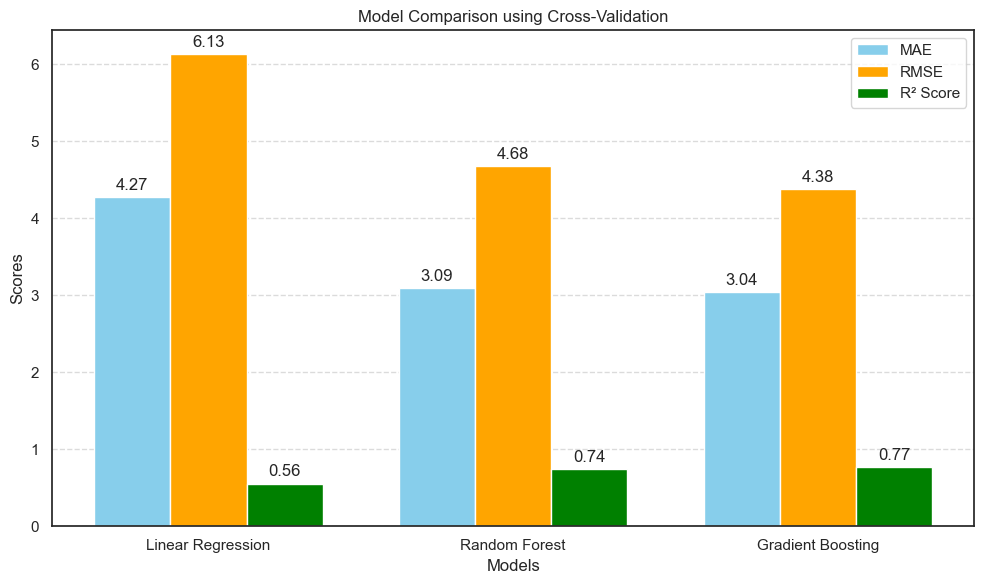

In [194]:
# COMPARISON

import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_scores = [4.269, 3.087, 3.038]
rmse_scores = [6.131, 4.678, 4.381]
r2_scores = [0.555, 0.741, 0.773]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
bar1 = ax.bar(x - width, mae_scores, width, label='MAE', color='skyblue')
bar2 = ax.bar(x, rmse_scores, width, label='RMSE', color='orange')
bar3 = ax.bar(x + width, r2_scores, width, label='R² Score', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison using Cross-Validation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


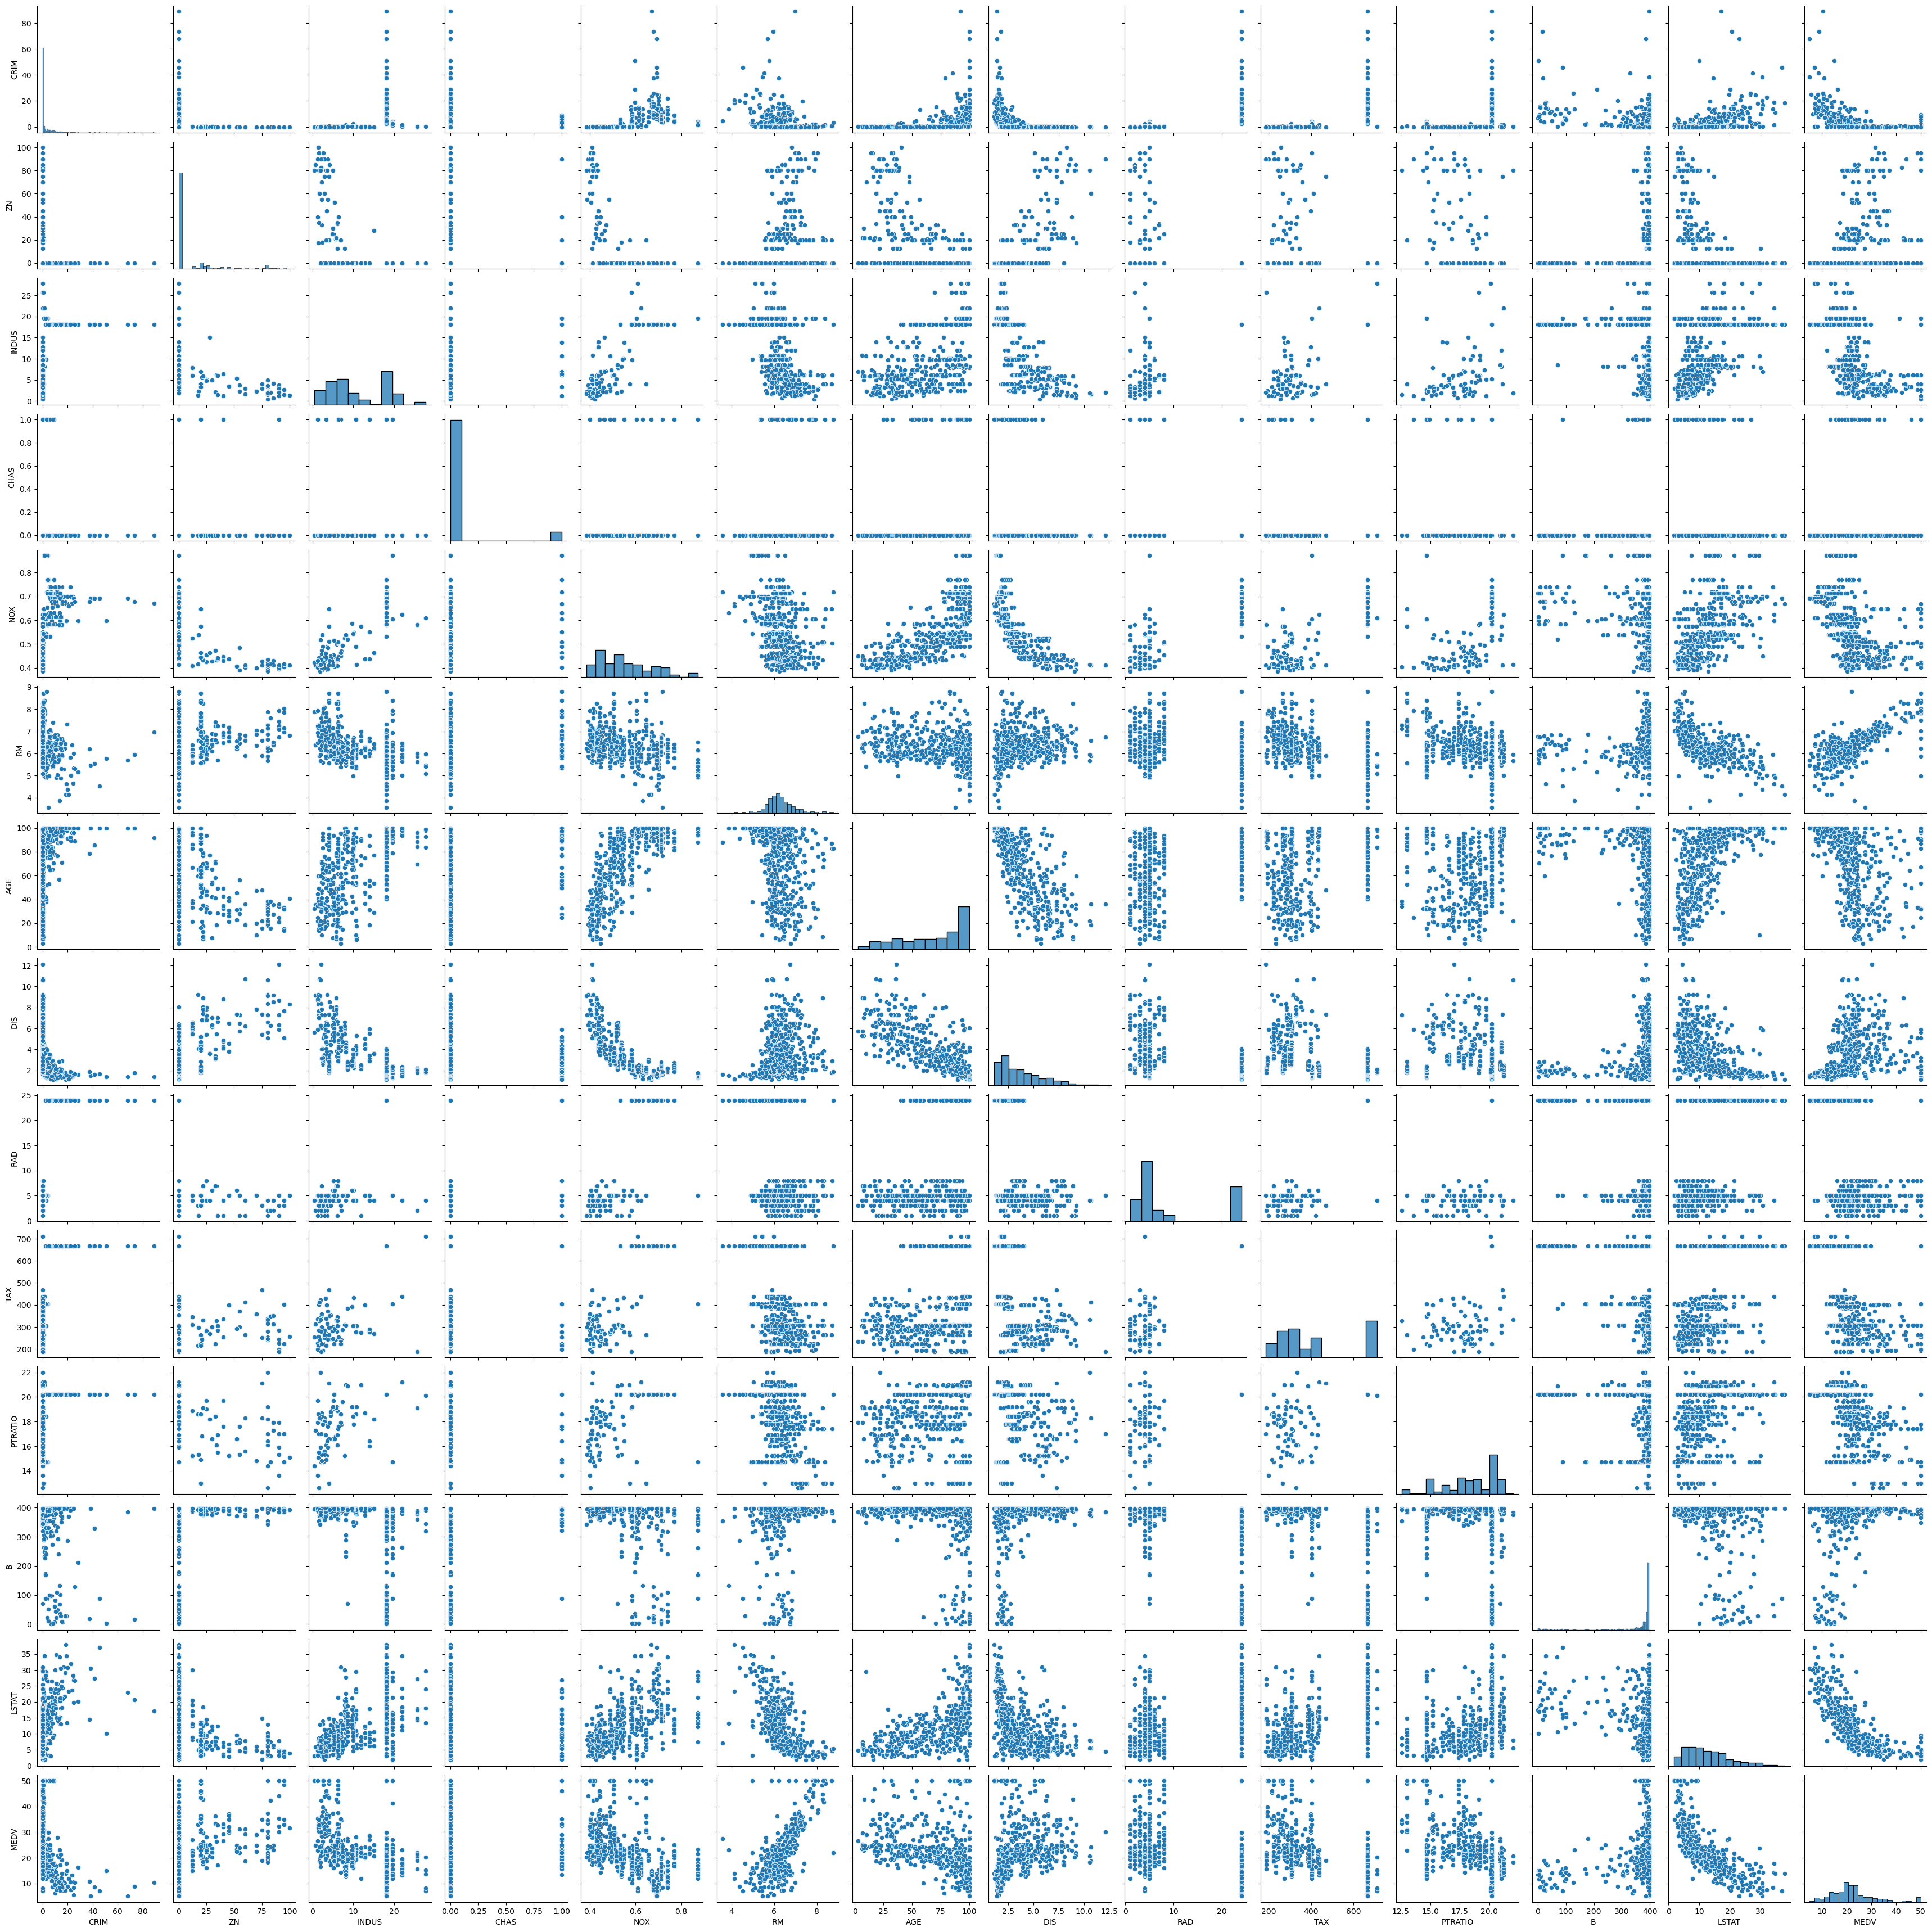

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


In [48]:
#Correlation analysis
corr = df.corr()

In [50]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536
